# Visualization for Delegation Based Lock

In [53]:
using DataFrames, CSV, StatsPlots

bench = CSV.read("output/output.csv", DataFrame);


  0.013277 seconds (33.94 k allocations: 1.262 MiB, 81.41% compilation time)


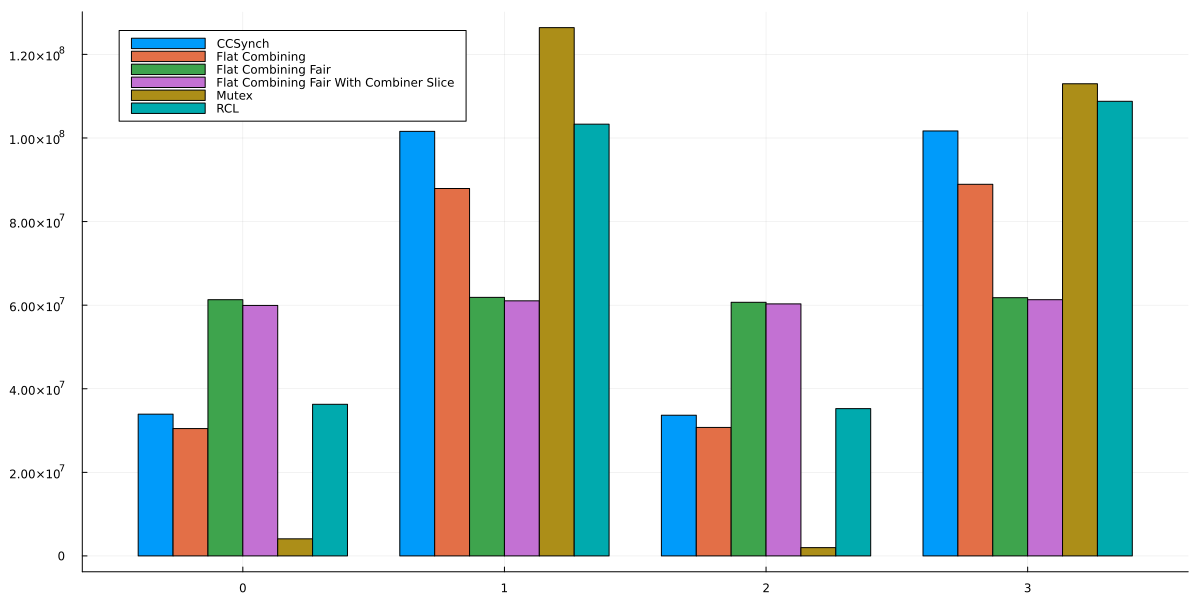

In [60]:
using StatsPlots

loop_comparison = @time @df bench groupedbar(:Id, :LoopCount, group=:Locktype, size=(1200,600))
savefig(loop_comparison, "graphs/loop_comparison.svg")
loop_comparison

In [55]:
bench

Row,Id,CpuId,LoopCount,NumAcquire,HoldTime,CombineTime,Locktype
,Int64,Int64,Int64,Int64,Int64,Int64,String
1,0,0,30473793,54796,622,0,Flat Combining
2,1,1,87917218,54002,1644,0,Flat Combining
3,2,2,30743232,56994,664,15942050518,Flat Combining
4,3,3,88916505,54544,1659,266596,Flat Combining
5,0,0,61299280,103435,1047,4436149189,Flat Combining Fair
6,1,1,61867455,34745,1051,2284675239,Flat Combining Fair
7,2,2,60690475,102202,1038,5203121655,Flat Combining Fair
8,3,3,61783635,34683,1049,2347006098,Flat Combining Fair
9,0,0,59933362,102704,1039,3633687547,Flat Combining Fair With Combiner Slice


  0.011577 seconds (32.62 k allocations: 1.188 MiB, 76.38% compilation time)


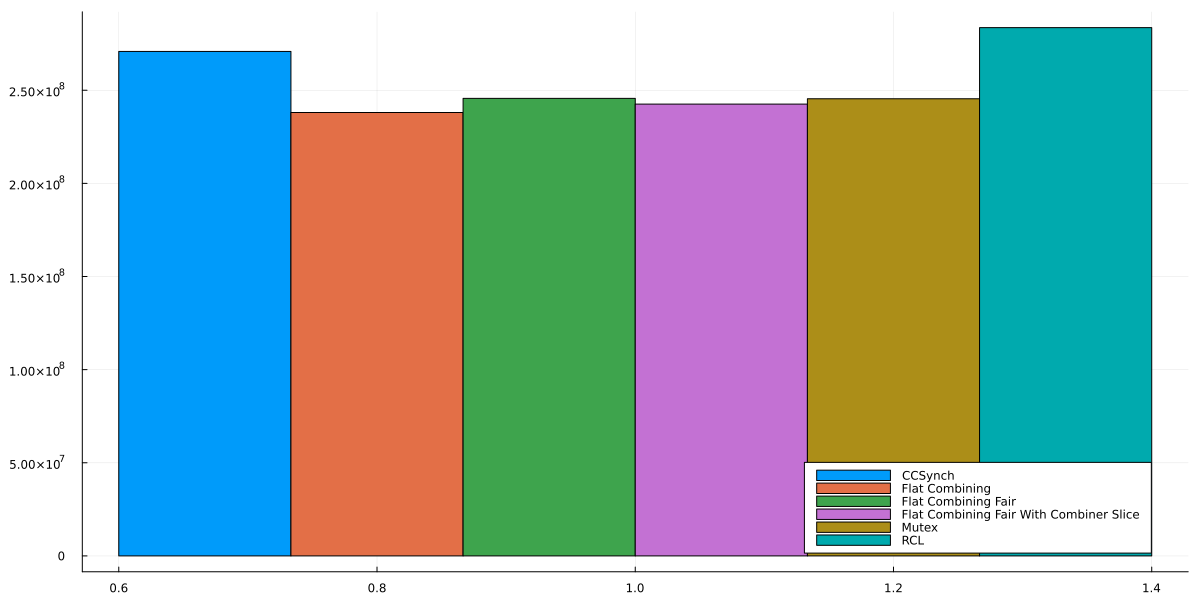

In [56]:
using Tidier

bench_all = @chain bench begin
    @group_by(Locktype)
    @summarize(overall_loop = sum(LoopCount))
end

@time @df bench_all groupedbar(:overall_loop, group=:Locktype, size=(1200,600))



  0.013943 seconds (33.94 k allocations: 1.262 MiB, 81.31% compilation time)


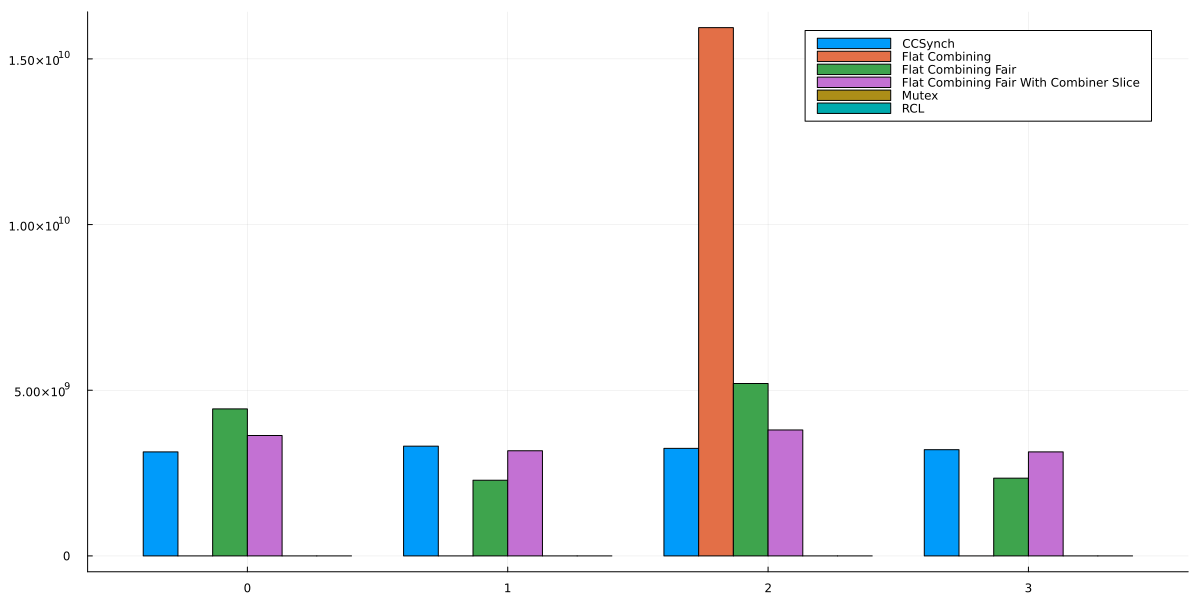

In [61]:
combiner_time_comparison = @time @df bench groupedbar(:Id, :CombineTime, group=:Locktype, size=(1200,600))
savefig("graphs/combiner_time_comparison.svg")
combiner_time_comparison
